## Women in Film & The Bechdel Test
* Emily J. Cain
* Capstone Project

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotly.graph_objs as go
import tmdbsimple as tmdb

from datetime import datetime
from get_path import path
from ratelimit import limits
from requests import get
from time import sleep, time
from warnings import warn

# beautiful soup
# scipy.stats

import json
import pandas as pd
import numpy as np
import tmdbsimple as tmdb

from get_path import path
from requests import get
from time import sleep, time
from warnings import warn

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
# Notes
# Include any custom functions used with docstrings
# External and Internal Hyperlinks (for table of contents)

# To add when time
# Add probability calculations to dataframe to be used for Tab Two on app?
# Slider stacked bar graph to show Oscar categories by year

## I. Data Collection & Cleaning

### Sources
#### Primary
* Bechdel Test Website - scraped
* TMDb API
* Wikidata SPARQL Queries

#### Supplemental
* Kaggle Datasets
* U.S. Census Bureau
* Motion Picture Association of America (MPAA)
* Women's Media Center (WMC)

### A. Bechdel Test Website
Scraped using Beautiful Soup to obtain:
* Name of movie
* Year
* Total points
    * 1 point for at least two named female characters ("Woman in Cafe #1", for example, would not qualify)
    * 2 points for named female characters who talk to each other
    * 3 points for named female characters who talk to each other about something other than a man
* Passing or Non-Passing (3 points = Passing)

### B. TMDb (The Movie Database) API
* Final API calls made with
    * `requests`
    * `get`
    * ratelimit wrapper
   

* The tmdbsimple library was not ultimately used due to inability to easily limit requests according to API guidelines

#### Import API Key

In [8]:
with open(path) as f:
    data = json.load(f)

In [9]:
tmdb.API_KEY = data['key']

In [10]:
api_key = data['key']

#### tmdbsimple wrapper

##### Title Query - basic movie info

In [8]:
search = tmdb.Search()
response = search.movie(query='How to Train Your Dragon: The Hidden World')
for s in search.results:
    print(s)

{'vote_count': 993, 'id': 166428, 'video': False, 'vote_average': 7.8, 'title': 'How to Train Your Dragon: The Hidden World', 'popularity': 310.039, 'poster_path': '/xvx4Yhf0DVH8G4LzNISpMfFBDy2.jpg', 'original_language': 'en', 'original_title': 'How to Train Your Dragon: The Hidden World', 'genre_ids': [16, 10751, 12], 'backdrop_path': '/h3KN24PrOheHVYs9ypuOIdFBEpX.jpg', 'adult': False, 'overview': 'As Hiccup fulfills his dream of creating a peaceful dragon utopia, Toothless’ discovery of an untamed, elusive mate draws the Night Fury away. When danger mounts at home and Hiccup’s reign as village chief is tested, both dragon and rider must make impossible decisions to save their kind.', 'release_date': '2019-01-03'}


##### TMDb id - movie details

In [9]:
response = tmdb.Movies(166428).info()

In [10]:
response

{'adult': False,
 'backdrop_path': '/h3KN24PrOheHVYs9ypuOIdFBEpX.jpg',
 'belongs_to_collection': {'id': 89137,
  'name': 'How to Train Your Dragon Collection',
  'poster_path': '/4tBKIkPLFMkiZETjAMOHNoty8B1.jpg',
  'backdrop_path': '/mvcfPkOvgDJG2lEAxTz0NKqoQLo.jpg'},
 'budget': 129000000,
 'genres': [{'id': 16, 'name': 'Animation'},
  {'id': 10751, 'name': 'Family'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.howtotrainyourdragon.com/',
 'id': 166428,
 'imdb_id': 'tt2386490',
 'original_language': 'en',
 'original_title': 'How to Train Your Dragon: The Hidden World',
 'overview': 'As Hiccup fulfills his dream of creating a peaceful dragon utopia, Toothless’ discovery of an untamed, elusive mate draws the Night Fury away. When danger mounts at home and Hiccup’s reign as village chief is tested, both dragon and rider must make impossible decisions to save their kind.',
 'popularity': 310.039,
 'poster_path': '/xvx4Yhf0DVH8G4LzNISpMfFBDy2.jpg',
 'production_companies':

#### Requests with no wrapper

##### Custom Functions

In [ ]:
@limits(calls=40, period=10)
def call_api(url):
    """
    Function takes url as argument, checks status code, and returns response.
    Ratelimit wrapper used to adhere to TMDb API guideline of no more than 40 calls in 10 seconds.
    """
    response = get(url)
    if response.status_code != 200:
        raise Exception('API response: {}'.format(response.status_code))
    return response

##### Test Function

In [122]:
# test list
imdb_id_list = ['tt5316540', 'tt5719748', 'tt2386490']
movie_pages = []
for imdb_id in imdb_id_list:
    url = 'https://api.themoviedb.org/3/find/' + imdb_id + '?api_key=' + api_key + '&external_source=imdb_id'
    response = call_api(url)
    movie_pages.append(response.json())

In [123]:
movie_pages

[{'movie_results': [{'adult': False,
    'backdrop_path': '/j7n2zYUODG8ViBSq7VyXyGlwJfH.jpg',
    'genre_ids': [28, 53],
    'id': 460321,
    'original_language': 'en',
    'original_title': 'Close',
    'overview': 'A counter-terrorism expert takes a job protecting a young heiress. After an attempted kidnapping puts both of their lives in danger, they must flee.',
    'poster_path': '/gDvJFHJCVXce4SVDsbLOqUk9sKQ.jpg',
    'release_date': '2019-01-18',
    'title': 'Close',
    'video': False,
    'vote_average': 5.6,
    'vote_count': 222,
    'popularity': 23.585}],
  'person_results': [],
  'tv_results': [],
  'tv_episode_results': [],
  'tv_season_results': []},
 {'movie_results': [{'adult': False,
    'backdrop_path': '/7Wg6FOEvhduISlxSzSCutAl4lPq.jpg',
    'genre_ids': [53, 28, 18],
    'id': 438650,
    'original_language': 'en',
    'original_title': 'Cold Pursuit',
    'overview': "Nels Coxman's quiet life comes crashing down when his beloved son dies under mysterious circums

#### Use `for` loops to use imdb ids from Bechdel Test dataset to get budget and revenue values

In [ ]:
imdb_id_list = imdb_ids
movie_pages = []
tmdb_ids = []
budgets = {}
revenues = {}
bad_ids = []

In [196]:
start = datetime.now()

for imdb_id in imdb_id_list:
    
    url = 'https://api.themoviedb.org/3/find/' + imdb_id + '?api_key=' + api_key + '&external_source=imdb_id'
    response = call_api(url)
    movie_info = response.json()
    if movie_info['movie_results']:
        movie_pages.append(movie_info)
    else:
        print(f'No info for {imdb_id}')
        bad_ids.append(imdb_id)
        
elapsed = start - datetime.now()
print(f'Total time: {elapsed}')

No info for tt5861756
No info for tt
No info for tt
No info for tt5598192
No info for tt5833846
No info for tt7341676
No info for tt6524480
No info for tt5675620
No info for tt5997830
No info for tt4956232
No info for tt4270492
No info for tt4869556
No info for tt4644822
No info for tt5709236
No info for tt5022298
No info for tt6220550
No info for tt2938496
No info for tt5580664
No info for tt4000768
No info for tt4108134
No info for tt4498966
No info for tt4895704
No info for tt6663788
No info for tt4780834
No info for tt2431438
No info for tt4858280
No info for tt2742544
No info for tt3749900
No info for tt3638604
No info for tt4211680
No info for tt3566726
No info for tt3457342
No info for tt3630276
No info for tt2964334
No info for tt3448098
No info for tt2294189
No info for tt2991316
No info for tt2309295
No info for tt1856010
No info for tt191181
No info for tt2628260
No info for tt2520512
No info for tt2407574
No info for tt2234222
No info for tt3066242
No info for tt2255372
No 

In [197]:
len(movie_pages)

7961

In [198]:
len(bad_ids)

128

In [199]:
bad_ids_df = pd.Series(data=bad_ids)
bad_ids_df.head()

0    tt5861756
1           tt
2           tt
3    tt5598192
4    tt5833846
dtype: object

Bad ids were used to check for TV shows, other type of media that wouldn't have come up in API search for movies, and incorrect data. 

In [202]:
for movie in movie_pages:
    tmdb_ids.append(movie['movie_results'][0]['id'])

In [204]:
start = datetime.now()

for tmdb_id in tmdb_ids:
    url = 'https://api.themoviedb.org/3/movie/' + str(tmdb_id) + '?api_key=' + api_key
    response = call_api(url)
    movie_details = response.json()
    imdb_id = movie_details['imdb_id']
    budgets[imdb_id] = movie_details['budget']
    revenues[imdb_id] = movie_details['revenue']
    
elapsed = datetime.now() - start
print(f'Total time: {elapsed}')

Total time: 0:49:08.690481


In [206]:
budget_df = pd.DataFrame.from_dict(data=budgets, orient='index')
revenue_df = pd.DataFrame.from_dict(data=revenues, orient='index')

### C. Wikidata SPARQL Queries
* Used to find movies that had a Bechdel Test id to obtain (if available):
    * Director(s) Name & Gender
    * Screenwriter(s) Name & Gender
    * Producer(s) Name & Gender
    * Film Budget
    * Box Office Revenue
    
    
* Used for Academy Awards queries to obtain (if available):
    * Nominees and Winners for all current and defunct non-acting categories
    * Names
    * Genders
    * Year of Awards show

#### Academy Awards Data - Nominees

In [8]:
oscar_nominees = pd.read_csv('my_data/oscarnomineesnobestpic.csv')
oscar_nominees.head()

,humanLabel,genderLabel,nominationLabel,year
0,Charlie Chaplin,male,"Academy Award for Best Writing, Original Scree...",1948
1,Charlie Chaplin,male,"Academy Award for Best Writing, Original Scree...",1941
2,Peter Jackson,male,"Academy Award for Best Writing, Original Scree...",1995
3,Michel Hazanavicius,male,"Academy Award for Best Writing, Original Scree...",2012
4,Sylvester Stallone,male,"Academy Award for Best Writing, Original Scree...",1977


#### Check unique gender values

In [9]:
oscar_nominees.genderLabel.value_counts()

male          8543
female        1025
non-binary       1
Name: genderLabel, dtype: int64

In [10]:
oscar_nominees.query('genderLabel == "non-binary"')

,humanLabel,genderLabel,nominationLabel,year
3058,Sam Smith,non-binary,Academy Award for Best Original Song,2016


In [11]:
oscar_nominees.shape

(9600, 4)

In [8]:
oscar_nominees.nominationLabel.value_counts()

Academy Award for Best Sound Mixing                         1049
Academy Award for Best Production Design                     731
Academy Award for Best Writing, Adapted Screenplay           661
Academy Award for Best Writing, Original Screenplay          623
Academy Award for Best Film Editing                          542
Academy Award for Best Visual Effects                        504
Academy Award for Best Director                              442
Academy Award for Best Animated Short Film                   425
Academy Award for Best Documentary (Short Subject)           411
Academy Award for Best Art Direction, Black and White        380
Academy Award for Best Live Action Short Film                379
Academy Award for Best Art Direction, Color                  371
Academy Award for Best Cinematography                        320
Academy Award for Best Costume Design                        289
Academy Award for Best Original Score                        283
Academy Award for Best Ma

#### Custom Functions Used

In [12]:
def condense_categories(category_string):
    
    """
    Function takes an Academy Award category string from Wikidata query and returns the useful information in new string.
    For example, the original argument of 'Academy Award for Best Original Song' would return 'Original Song'
    """
    
    split_category_string = category_string.split(' ')
    condensed_category_string = split_category_string[4:]
    return ' '.join(condensed_category_string)

In [13]:
def clean_oscar_sparql_query(df, award_column, new_award_column):
    
    """
    Function takes DataFrame generated from Wikidata query, the string value of the award_column name, the new desired string 
    value for the award_column and returns new DataFrame. The condense_categories function is applied to the values in the awards
    column, and the humanLabel, genderLabel, and award_column are renamed to name, gender, and new_award_column, respectively.
    """
    
    df[award_column] = df[award_column].map(condense_categories)
    df.rename({'humanLabel': 'name', 'genderLabel': 'gender', award_column: new_award_column}, axis=1, inplace=True)
    return df

In [14]:
clean_oscar_sparql_query(oscar_nominees, award_column='nominationLabel', new_award_column='nom_category')

,name,gender,nom_category,year
0,Charlie Chaplin,male,"Writing, Original Screenplay",1948
1,Charlie Chaplin,male,"Writing, Original Screenplay",1941
2,Peter Jackson,male,"Writing, Original Screenplay",1995
3,Michel Hazanavicius,male,"Writing, Original Screenplay",2012
4,Sylvester Stallone,male,"Writing, Original Screenplay",1977
5,Melvin Frank,male,"Writing, Original Screenplay",1974
6,Melvin Frank,male,"Writing, Original Screenplay",1955
7,Melvin Frank,male,"Writing, Original Screenplay",1961
8,Melvin Frank,male,"Writing, Original Screenplay",1947
9,Arthur C. Clarke,male,"Writing, Original Screenplay",1969


In [15]:
oscar_nominees.head()

,name,gender,nom_category,year
0,Charlie Chaplin,male,"Writing, Original Screenplay",1948
1,Charlie Chaplin,male,"Writing, Original Screenplay",1941
2,Peter Jackson,male,"Writing, Original Screenplay",1995
3,Michel Hazanavicius,male,"Writing, Original Screenplay",2012
4,Sylvester Stallone,male,"Writing, Original Screenplay",1977


In [16]:
oscar_nominees.tail()

,name,gender,nom_category,year
9595,Thomas Mead,male,"Live Action Short Film, Two-Reel",1949
9596,Ben K. Blake,male,"Live Action Short Film, Two-Reel",1948
9597,William Lasky,male,"Live Action Short Film, Two-Reel",1950
9598,Louis Harris,male,"Live Action Short Film, Two-Reel",1945
9599,John Healy,male,"Live Action Short Film, Two-Reel",1957


#### Check for null values

In [43]:
oscar_nominees.isnull().sum()

name             0
gender          30
nom_category     0
year             0
dtype: int64

In [44]:
null_genders = oscar_nominees.loc[oscar_nominees.gender.isnull()]
null_genders

,name,gender,nom_category,year
2434,Jocelyn Glatzer,NaN,Documentary Feature,2007
3755,Ariel Velasco-Shaw,NaN,Visual Effects,1994
4043,Lyle Conway,NaN,Visual Effects,1987
4117,Thaine Morris,NaN,Visual Effects,1989
4118,Kent Houston,NaN,Visual Effects,1990
6526,Eda Godel Hallinan,NaN,Animated Short Film,1984
6640,Jan Saunders,NaN,Live Action Short Film,1983
6646,Thom Colwell,NaN,Live Action Short Film,1996
6649,Gabriele Lins,NaN,Live Action Short Film,2000
6712,T.R. Conroy,NaN,Live Action Short Film,1992


In [ ]:
# look up genders to add later or drop if unknown

#### Save cleaned dataset to new csv

In [42]:
oscar_nominees.to_csv('my_data/cleaned_oscar_nominees.csv', index=False)

#### Academy Awards Data - Winners

In [18]:
oscar_winners = pd.read_csv('my_data/oscarwinnersquerynobestpicture.csv')
oscar_winners.head()

,humanLabel,genderLabel,awardLabel,year
0,Peter Jackson,male,Academy Award for Best Director,2004
1,Steven Spielberg,male,Academy Award for Best Director,1999
2,Steven Spielberg,male,Academy Award for Best Director,1994
3,Kevin Costner,male,Academy Award for Best Director,1991
4,Woody Allen,male,Academy Award for Best Director,1978


In [19]:
oscar_winners.genderLabel.unique()

array(['male', 'female', nan], dtype=object)

#### Check for null values

In [23]:
oscar_winners.isnull().sum()

humanLabel     0
genderLabel    2
awardLabel     0
year           0
dtype: int64

In [24]:
oscar_winners.loc[oscar_winners.genderLabel.isnull()]

,humanLabel,genderLabel,awardLabel,year
720,Robie Robinson,NaN,Academy Award for Best Visual Effects,1970
1507,Gerardine Wurzburg,NaN,Academy Award for Best Documentary (Short Subj...,1993


Cannot find information online for Robie Robinson, so will drop from both datasets. 

In [25]:
oscar_nominees = oscar_nominees.loc[oscar_nominees.name != 'Robie Robinson']
oscar_winners = oscar_winners.loc[oscar_winners.humanLabel != 'Robie Robinson']

In [34]:
oscar_winners.at[1507,'genderLabel'] = 'female'

In [37]:
oscar_winners.isnull().sum()

humanLabel     0
genderLabel    0
awardLabel     0
year           0
dtype: int64

#### Apply cleaning functions

In [38]:
clean_oscar_sparql_query(oscar_winners, award_column='awardLabel', new_award_column='win_category')

,name,gender,win_category,year
0,Peter Jackson,male,Director,2004
1,Steven Spielberg,male,Director,1999
2,Steven Spielberg,male,Director,1994
3,Kevin Costner,male,Director,1991
4,Woody Allen,male,Director,1978
5,Alfonso Cuarón,male,Director,2014
6,Michel Hazanavicius,male,Director,2012
7,Kathryn Bigelow,female,Director,2010
8,Mel Gibson,male,Director,1996
9,Clint Eastwood,male,Director,1993


In [39]:
oscar_winners.shape

(2056, 4)

In [40]:
oscar_winners.tail()

,name,gender,win_category,year
2052,Jerry Fairbanks,male,"Live Action Short Film, One-Reel",1945
2053,Sam Coslow,male,"Live Action Short Film, Two-Reel",1944
2054,Boris Vermont,male,"Live Action Short Film, One-Reel",1953
2055,Konstantin Kalser,male,"Live Action Short Film, One-Reel",1957
2056,Wilbur T. Blume,male,"Live Action Short Film, Two-Reel",1956


#### Save new cleaned dataset to csv

In [41]:
oscar_winners.to_csv('my_data/cleaned_oscar_winners.csv', index=False)

## II. Exploratory Data Analysis & Visualizations

### A. Oscar Nominees

#### Visualize total nominees by gender

In [46]:
print(oscar_nominees.year.min())
print(oscar_nominees.year.max())

1929
2019


In [47]:
oscar_nominees.gender.value_counts()

male          8543
female        1025
non-binary       1
Name: gender, dtype: int64

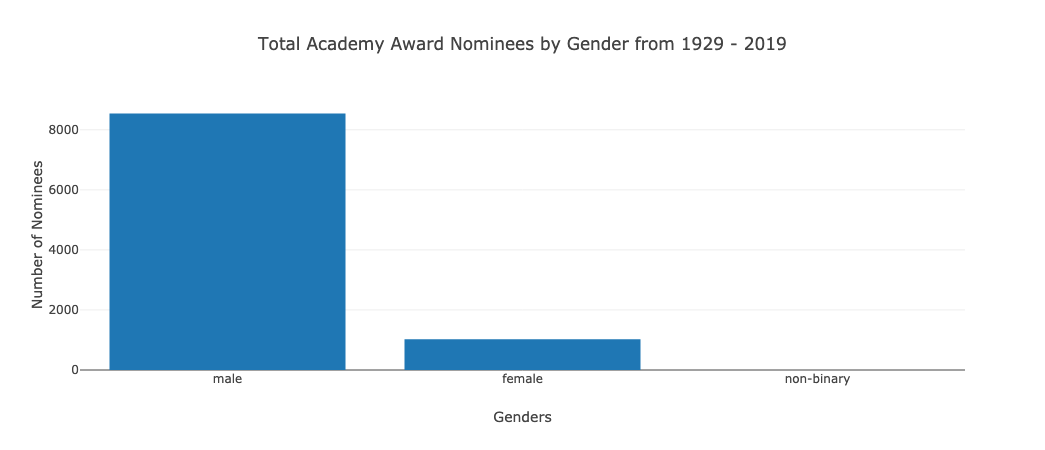

In [45]:
trace = go.Bar(
            x=["male", "female", "non-binary"],
            y=[oscar_nominees.gender.value_counts()["male"],
               oscar_nominees.gender.value_counts()["female"],
               oscar_nominees.gender.value_counts()["non-binary"]
              ]
)
data = [trace]    
layout = go.Layout(title="Total Academy Award Nominees by Gender from 1929 - 2019",
                   xaxis=dict(title="Genders"), 
                   yaxis=dict(title="Number of Nominees"))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Visualize Gender Counts of Oscar Nominees by Year

In [49]:
male_nominees = oscar_nominees.loc[oscar_nominees.gender == 'male']
female_nominees = oscar_nominees.loc[oscar_nominees.gender == 'female']
non_binary_nominees = oscar_nominees.loc[oscar_nominees.gender == 'non-binary']

Create lists for y-values of number of nominees for each gender for each year. Check to see if any person of that gender was nominated in each year to avoid throwing errors.

In [50]:
male_counts = []
female_counts = []
non_binary_counts = []

for y in oscar_nominees.year.unique():
    if y in male_nominees.year.values:
        male_counts.append(male_nominees.year.value_counts()[y])
    else:
        male_counts.append(0)
    if y in female_nominees.year.values:
        female_counts.append(female_nominees.year.value_counts()[y])
    else:
        female_counts.append(0)
    if y in non_binary_nominees.year.values:
        non_binary_counts.append(non_binary_nominees.year.value_counts()[y])
    else:
        non_binary_counts.append(0)

Check accuracy

In [51]:
print(f'Total male nominees: {np.sum(male_counts)}')
print(f'Total female nominees: {np.sum(female_counts)}')
print(f'Total non-binary nominees: {np.sum(non_binary_counts)}')

Total male nominees: 8543
Total female nominees: 1025
Total non-binary nominees: 1


In [52]:
oscar_nominees.gender.value_counts()

male          8543
female        1025
non-binary       1
Name: gender, dtype: int64

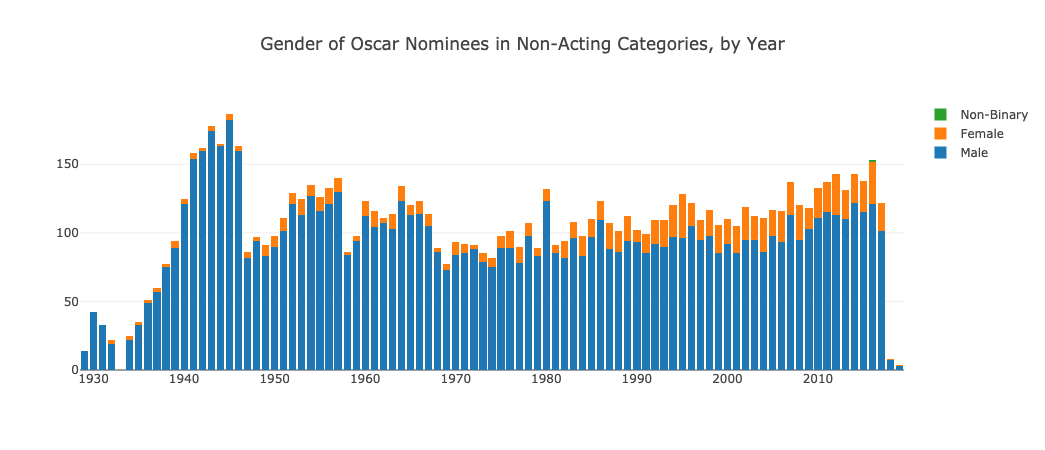

In [53]:
years = oscar_nominees.year.unique()
y_gender_values = [male_counts, female_counts, non_binary_counts]

trace1 = go.Bar(
    x=years,
    y=y_gender_values[0],
    name="Male"
)
trace2 = go.Bar(
    x=years,
    y=y_gender_values[1],
    name="Female"
)

trace3 = go.Bar(
    x=years,
    y=y_gender_values[2],
    name="Non-Binary"
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack',
    title="Gender of Oscar Nominees in Non-Acting Categories, by Year"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### Investigate year with no nominees

In [55]:
sorted(oscar_nominees.year.unique())

[1929,
 1930,
 1931,
 1932,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

There was an Awards ceremony held in 1933 - the 6th Annual Academy Awards - and there was also one female winner out of two female nominees in writing categories. For some reason, this ceremony did not appear in the Wikidata query, so will need to be added manually at a later time to improve accuracy of the data and analysis. 

## III. Conditional Probability with Bayes Theorem

## IV. Hypothesis Testing

## V. Dashboard
* Visualize important insight & metrics
* Allow user to explore, customize, and extract the data that interests them

## VI. Conclusion

### A. Crowdsourced Data

## VII. Recommendations

### A. Existing Projects & Initiatives:
* Annenberg Inclusion Initiative - University of Southern California based think tank focused on diversity and inclusion in entertainment
* Women's Media Center - Nonpartisan and Non-profit organization founded by Jane Fonda, Robin Morgan and Gloria Steinem to raise awareness and take action on a wide range of issues affecting women and girls
* Geena Davis Institute on Gender & Media - "If she can see it, she can be it" - promotes increased visibility of women in media and in other roles, especially in roles where girls may not have seen much female representation
* Women in Media - Non-profit organization promoting gender balance in media by offering networking for female and female-identifying crew members

## VIII. Further Research